### Calculating the alpha and beta of an investment strategy ### 

**Instructions:**  Download historical ticker prices for AAPL and SPY from <https://finance.yahoo.com/>
Consider a strategy of the following:
* if AAPL goes down two days in a row, buy a share the next day and sell it the ensuing day.
* if AAPL goes up two days in a row, short a share the next day and unload the short the ensuing day.
* if neither happens, buy a share of SPY and sell it the ensuing day (i.e., the market)

What is the alpha and beta of this strategy?

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy.stats
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter as StrMethodFormatter
idx = pandas.IndexSlice
import pandas as pd

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
sim_color="red"
N_samples=1000

In [2]:
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

**Alpha** is the excess return (also known as the active return), an investment or a portfolio of investments ushers in, above and beyond a market index or benchmark that represent the market’s broader movements.

**Beta** fundamentally analyzes the volatility of an asset or portfolio in relation to the overall market, to help investors determine how much risk they’re willing to take to achieve the return for taking on said risk.

In [3]:
#Here I am going to make the data variables so that they're going to be easier to work with

MARKET = "SPY"
ASSET = "AAPL"
Treasury = .02
riskfree = Treasury/252

In [4]:
#Extracting the adjusted closing price from both the stocks

def getdata(ticker):
    data = pd.read_csv(ticker+".csv", index_col=0)
    data.index = pd.to_datetime(data.index)
    S = pd.Series(data["Adj Close"], name=ticker)
    return S.copy()

market = getdata(MARKET)
asset = getdata(ASSET)

print(market.head())
print(asset.head())

Date
2018-11-13    266.759003
2018-11-14    264.935272
2018-11-15    267.700317
2018-11-16    268.396484
2018-11-19    263.856689
Name: SPY, dtype: float64
Date
2018-11-13    189.384476
2018-11-14    184.034882
2018-11-15    188.576630
2018-11-16    190.665237
2018-11-19    183.108780
Name: AAPL, dtype: float64


In [5]:
data_raw = pd.concat([market, asset], axis="columns", join="inner")
data_raw.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


In [6]:
prices = data_raw.copy()
prices.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


C:\Users\kausa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


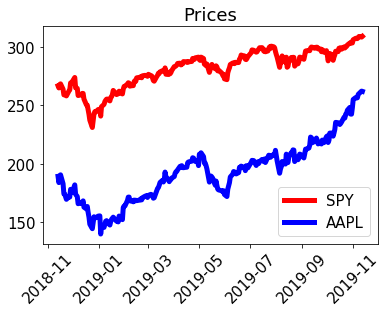

In [7]:
plt.figure()
plt.plot(prices.index,prices["SPY"].values,label=MARKET,color="red")
plt.plot(prices.index,prices["AAPL"].values,label=ASSET,color="blue")
plt.legend()
plt.title("Prices")
plt.xticks(rotation = 45)
saver("prices")
plt.show()
plt.close()

In [59]:
returns = (prices/prices.shift())-1
returns_ra = returns - riskfree
returns_ra = returns_ra.dropna(axis="index")
returns_ra.head()

,SPY,AAPL
Date,,
2018-11-14,-0.006916,-0.028327
2018-11-15,0.010357,0.024599
2018-11-16,0.002521,0.010996
2018-11-19,-0.016994,-0.039711
2018-11-20,-0.018586,-0.047857


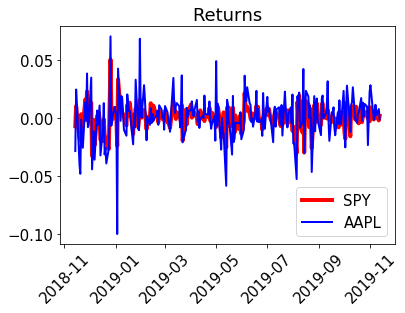

In [9]:
plt.figure()
plt.plot(returns.index, returns["SPY"].values, label = MARKET, color="red", linewidth=4)
plt.plot(returns.index, returns["AAPL"].values, label=ASSET, color="blue", linewidth=2)
plt.legend()
plt.title("Returns")
plt.xticks(rotation = 45)
saver("returns")
plt.show()
plt.close()

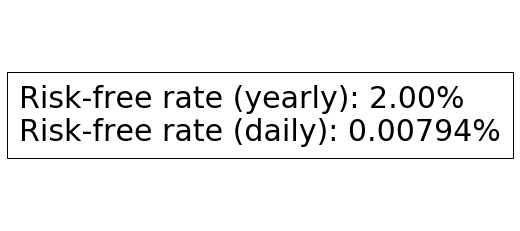

In [10]:
text = []
text.append("Risk-free rate (yearly): {0:.2%}".format(Treasury))
text.append("Risk-free rate (daily): {0:.5%}".format(riskfree))
fig,ax = plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("riskfree")
plt.show()
plt.close()

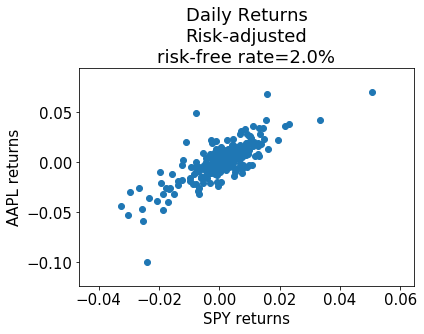

In [11]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET])
plt.xlabel(MARKET + " returns")
plt.ylabel(ASSET + " returns")
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("returns_scatter")
plt.show()
plt.close()

In [12]:
slope,intercept,_,_,_ = scipy.stats.linregress(returns_ra[MARKET],returns_ra[ASSET])
print(slope)
print(intercept)
alpha = intercept
beta = slope

1.5348728704816224
0.0005433689891449142


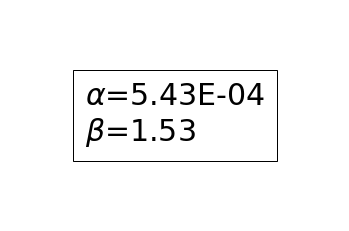

In [13]:
text = []
text.append(r"$\alpha$={0:.2E}".format(alpha))
text.append(r"$\beta$={0:.2f}".format(beta))
fig,ax = plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc = "center", prop = dict(size = 30)))
ax.axis('off')
saver("slopeintercept")
plt.show()
plt.close()

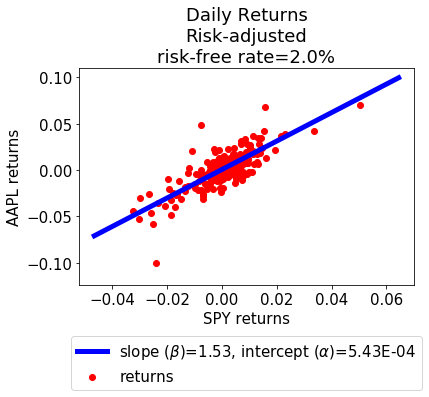

In [14]:
plt.figure()
plt.scatter(returns_ra[MARKET], returns_ra[ASSET], color = "red", label = "returns")
plt.xlabel(MARKET + " returns")
plt.ylabel(ASSET + " returns")
xlims = numpy.array(plt.gca().get_xlim())
linestr=r"slope ($\beta$)={0:.2f}, intercept ($\alpha$)={1:.2E}".format(slope,intercept)
plt.plot(xlims, intercept + slope*xlims, color="blue", label=linestr)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("bestline")
plt.show()
plt.close()

In [15]:
R = returns[ASSET]-returns[MARKET]
R.head()

Date
2018-11-13         NaN
2018-11-14   -0.021411
2018-11-15    0.014242
2018-11-16    0.008475
2018-11-19   -0.022718
dtype: float64

0.06688106442041475


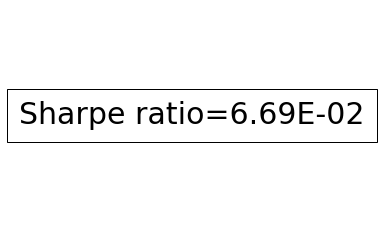

In [16]:
Sharpe=R.mean()/R.std()
print(Sharpe)

text=[]
text.append("Sharpe ratio={0:.2E}".format(Sharpe))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("Sharpe")
plt.show()
plt.close()

In [17]:
r_scl=alpha+(beta-1)*returns_ra[MARKET].mean()
print(r_scl)
print(R.mean())

0.0008408169679118222
0.0008408169679118229


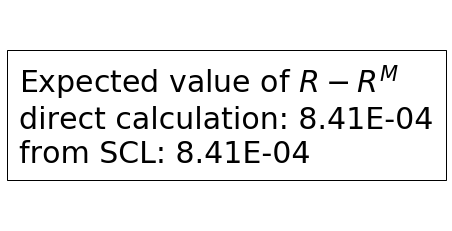

In [18]:
text = []
text.append(r"Expected value of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.mean()))
text.append("from SCL: {0:.2E}".format(r_scl))
fig,ax = plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("mean_compare")
plt.show()
plt.close()

In [19]:
err = returns_ra[ASSET] - (alpha+beta*returns_ra[MARKET])
v_scl = (beta-1)**2*returns_ra[MARKET].var() + err.var()
print(v_scl)
print(R.var())

0.00015805075759135973
0.00015805075759135997


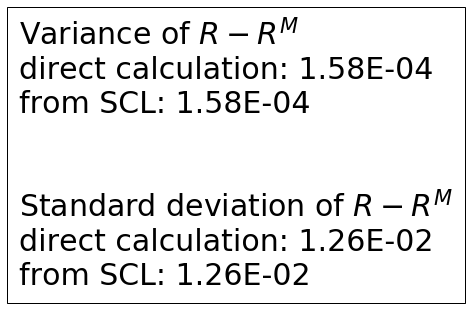

In [20]:
text = []
text.append(r"Variance of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.var()))
text.append("from SCL: {0:.2E}".format(v_scl))
text.append("\n")
text.append(r"Standard deviation of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.std()))
text.append("from SCL: {0:.2E}".format(numpy.sqrt(v_scl)))
fig,ax = plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc = "center",prop=dict(size=30)))
ax.axis('off')
saver("var_compare")
plt.show()
plt.close()

In [21]:
Treasury = 0.02
riskfree = Treasury/252

In [22]:
def getdata(ticker):
    data = pandas.read_csv(ticker+".csv",index_col=0)
    data.index = pandas.to_datetime(data.index)
    S=pandas.Series(data["Adj Close"],name=ticker)
    return S.copy()

market=getdata(MARKET)
asset=getdata(ASSET)

print(market.head())
print(asset.head())

Date
2018-11-13    266.759003
2018-11-14    264.935272
2018-11-15    267.700317
2018-11-16    268.396484
2018-11-19    263.856689
Name: SPY, dtype: float64
Date
2018-11-13    189.384476
2018-11-14    184.034882
2018-11-15    188.576630
2018-11-16    190.665237
2018-11-19    183.108780
Name: AAPL, dtype: float64


In [23]:
data_raw = pandas.concat([market,asset], axis = "columns",join = "inner")
data_raw.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


In [24]:
prices = data_raw.copy()
prices.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


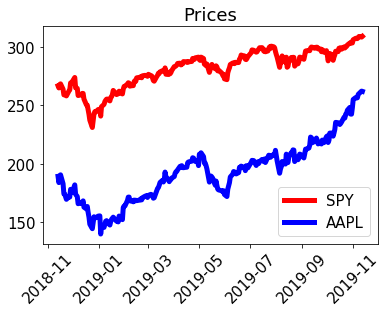

In [25]:
plt.figure()
plt.plot(prices.index,prices["SPY"].values, label = MARKET,color = "red")
plt.plot(prices.index,prices["AAPL"].values, label = ASSET,color = "blue")
plt.legend()
plt.title("Prices")
plt.xticks(rotation = 45)
saver("prices")
plt.show()
plt.close()

In [26]:
returns = prices/prices.shift()-1
returns_ra = returns - riskfree
returns_ra = returns_ra.dropna(axis = "index")
returns_ra.head()

,SPY,AAPL
Date,,
2018-11-14,-0.006916,-0.028327
2018-11-15,0.010357,0.024599
2018-11-16,0.002521,0.010996
2018-11-19,-0.016994,-0.039711
2018-11-20,-0.018586,-0.047857


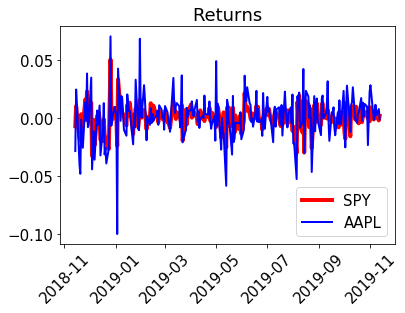

In [27]:
plt.figure()
plt.plot(returns.index,returns["SPY"].values,label=MARKET,color="red",linewidth=4)
plt.plot(returns.index,returns["AAPL"].values,label=ASSET,color="blue",linewidth=2)
plt.legend()
plt.title("Returns")
plt.xticks(rotation=45)
saver("returns")
plt.show()
plt.close()

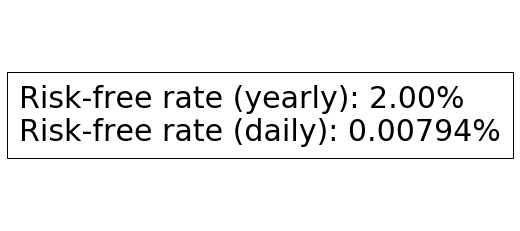

In [28]:
text=[]
text.append("Risk-free rate (yearly): {0:.2%}".format(Treasury))
text.append("Risk-free rate (daily): {0:.5%}".format(riskfree))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("riskfree")
plt.show()
plt.close()

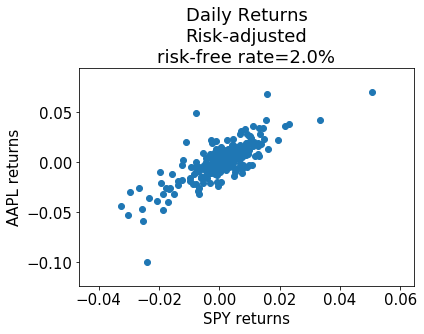

In [29]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET])
plt.xlabel(MARKET+" returns")
plt.ylabel(ASSET+" returns")
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("returns_scatter")
plt.show()
plt.close()

In [30]:
slope,intercept,_,_,_=scipy.stats.linregress(returns_ra[MARKET],returns_ra[ASSET])
print(slope)
print(intercept)
alpha=intercept
beta=slope

1.5348728704816224
0.0005433689891449142


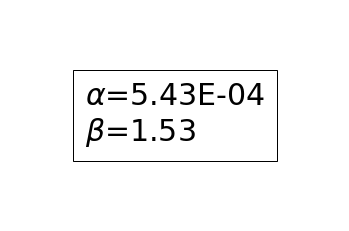

In [31]:
text=[]
text.append(r"$\alpha$={0:.2E}".format(alpha))
text.append(r"$\beta$={0:.2f}".format(beta))
#text_str.append(r"$\sup|F_e-F_t|$={0:.2f}".format(maxval))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("slopeintercept")
plt.show()
plt.close()

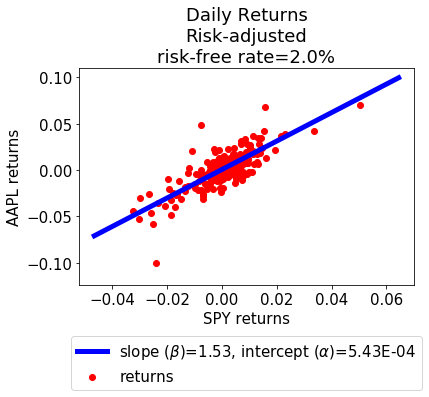

In [32]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET],color="red",label="returns")
plt.xlabel(MARKET+" returns")
plt.ylabel(ASSET+" returns")
xlims=numpy.array(plt.gca().get_xlim())
linestr=r"slope ($\beta$)={0:.2f}, intercept ($\alpha$)={1:.2E}".format(slope,intercept)
plt.plot(xlims,intercept+slope*xlims,color="blue",label=linestr)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("bestline")
plt.show()
plt.close()

In [33]:
R=returns[ASSET]-returns[MARKET]
R.head()

Date
2018-11-13         NaN
2018-11-14   -0.021411
2018-11-15    0.014242
2018-11-16    0.008475
2018-11-19   -0.022718
dtype: float64

0.06688106442041475


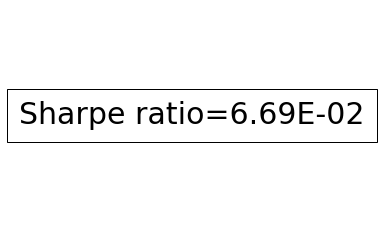

In [34]:
Sharpe=R.mean()/R.std()
print(Sharpe)
text=[]
text.append("Sharpe ratio={0:.2E}".format(Sharpe))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("Sharpe")
plt.show()
plt.close()

In [35]:
r_scl=alpha+(beta-1)*returns_ra[MARKET].mean()
print(r_scl)
print(R.mean())

0.0008408169679118222
0.0008408169679118229


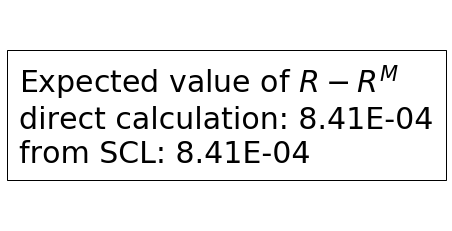

In [36]:
text=[]
text.append(r"Expected value of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.mean()))
text.append("from SCL: {0:.2E}".format(r_scl))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("mean_compare")
plt.show()
plt.close()

In [37]:
err=returns_ra[ASSET]-(alpha+beta*returns_ra[MARKET])
v_scl=(beta-1)**2*returns_ra[MARKET].var()+err.var()
print(v_scl)
print(R.var())

0.00015805075759135973
0.00015805075759135997


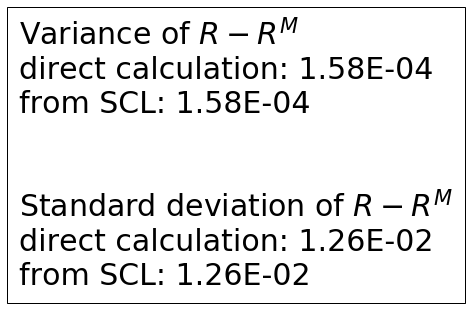

In [38]:
text=[]
text.append(r"Variance of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.var()))
text.append("from SCL: {0:.2E}".format(v_scl))
text.append("\n")
text.append(r"Standard deviation of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.std()))
text.append("from SCL: {0:.2E}".format(numpy.sqrt(v_scl)))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("var_compare")
plt.show()
plt.close()

In [39]:
Treasury= 0.02 #avg treasury rate
riskfree=Treasury/252

In [40]:
def getdata(ticker):
    data=pandas.read_csv(ticker+".csv",index_col=0)
    data.index = pandas.to_datetime(data.index)
    S=pandas.Series(data["Adj Close"],name=ticker)
    return S.copy()

market=getdata(MARKET)
asset=getdata(ASSET)

print(market.head())
print(asset.head())

Date
2018-11-13    266.759003
2018-11-14    264.935272
2018-11-15    267.700317
2018-11-16    268.396484
2018-11-19    263.856689
Name: SPY, dtype: float64
Date
2018-11-13    189.384476
2018-11-14    184.034882
2018-11-15    188.576630
2018-11-16    190.665237
2018-11-19    183.108780
Name: AAPL, dtype: float64


In [41]:
data_raw=pandas.concat([market,asset],axis="columns",join="inner")
data_raw.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


In [42]:
prices=data_raw.copy()
prices.head()

,SPY,AAPL
Date,,
2018-11-13,266.759003,189.384476
2018-11-14,264.935272,184.034882
2018-11-15,267.700317,188.576630
2018-11-16,268.396484,190.665237
2018-11-19,263.856689,183.108780


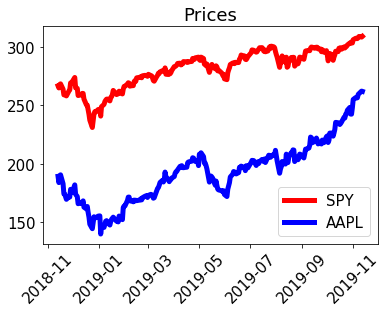

In [43]:
plt.figure()
plt.plot(prices.index,prices["SPY"].values,label=MARKET,color="red")
plt.plot(prices.index,prices["AAPL"].values,label=ASSET,color="blue")
plt.legend()
plt.title("Prices")
plt.xticks(rotation=45)
saver("prices")
plt.show()
plt.close()

In [44]:
returns=prices/prices.shift()-1
returns_ra=returns-riskfree
returns_ra=returns_ra.dropna(axis="index")
returns_ra.head()

,SPY,AAPL
Date,,
2018-11-14,-0.006916,-0.028327
2018-11-15,0.010357,0.024599
2018-11-16,0.002521,0.010996
2018-11-19,-0.016994,-0.039711
2018-11-20,-0.018586,-0.047857


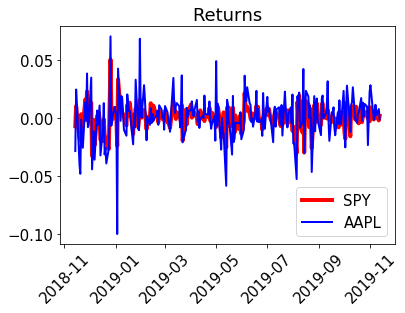

In [45]:
plt.figure()
plt.plot(returns.index,returns["SPY"].values,label=MARKET,color="red",linewidth=4)
plt.plot(returns.index,returns["AAPL"].values,label=ASSET,color="blue",linewidth=2)
plt.legend()
plt.title("Returns")
plt.xticks(rotation=45)
saver("returns")
plt.show()
plt.close()

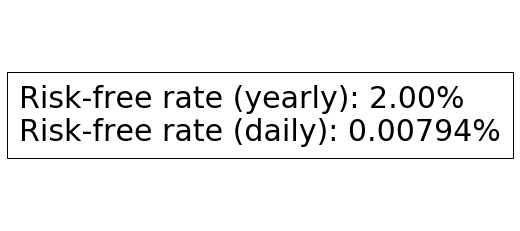

In [46]:
text=[]
text.append("Risk-free rate (yearly): {0:.2%}".format(Treasury))
text.append("Risk-free rate (daily): {0:.5%}".format(riskfree))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("riskfree")
plt.show()
plt.close()

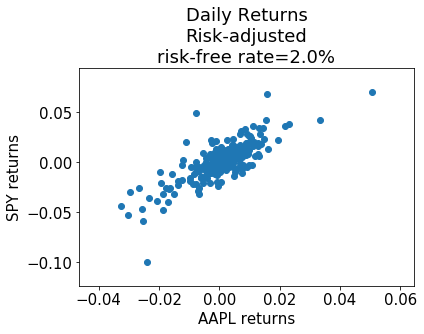

In [47]:
plt.figure()
plt.scatter(returns_ra[MARKET],returns_ra[ASSET])
plt.xlabel(ASSET+" returns")
plt.ylabel(MARKET+" returns")
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("returns_scatter")
plt.show()
plt.close()

In [48]:
slope,intercept,_,_,_=scipy.stats.linregress(returns_ra[ASSET],returns_ra[MARKET])
print(slope)
print(intercept)
alpha=intercept
beta=slope

0.4110795640934917
-1.813831978138942e-05


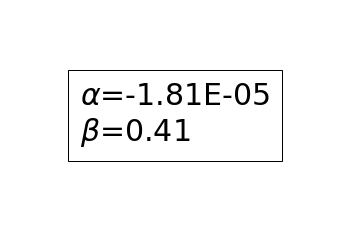

In [49]:
text=[]
text.append(r"$\alpha$={0:.2E}".format(alpha))
text.append(r"$\beta$={0:.2f}".format(beta))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("slopeintercept")
plt.show()
plt.close()

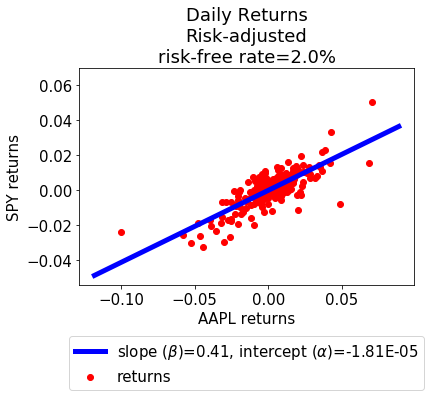

In [50]:
plt.figure()
plt.scatter(returns_ra[ASSET],returns_ra[MARKET],color="red",label="returns")
plt.xlabel(ASSET+" returns")
plt.ylabel(MARKET+" returns")
xlims=numpy.array(plt.gca().get_xlim())
linestr=r"slope ($\beta$)={0:.2f}, intercept ($\alpha$)={1:.2E}".format(slope,intercept)
plt.plot(xlims,intercept+slope*xlims,color="blue",label=linestr)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.title("Daily Returns\nRisk-adjusted\nrisk-free rate={0:.1%}".format(Treasury))
saver("bestline")
plt.show()
plt.close()

In [51]:
R=returns[ASSET]-returns[MARKET]
R.head()

Date
2018-11-13         NaN
2018-11-14   -0.021411
2018-11-15    0.014242
2018-11-16    0.008475
2018-11-19   -0.022718
dtype: float64

0.06688106442041475


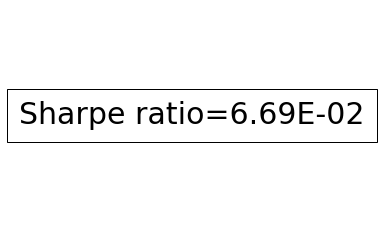

In [52]:
Sharpe=R.mean()/R.std()
print(Sharpe)
text=[]
text.append("Sharpe ratio={0:.2E}".format(Sharpe))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("Sharpe")
plt.show()
plt.close()

In [53]:
r_scl=alpha+(beta-1)*returns_ra[MARKET].mean()
print(r_scl)
print(R.mean())

-0.000345642672651603
0.0008408169679118229


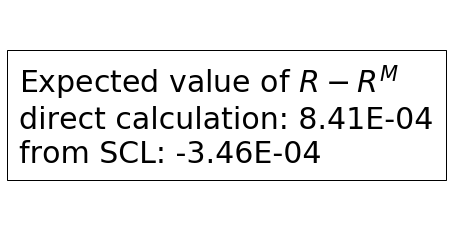

In [54]:
text=[]
text.append(r"Expected value of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.mean()))
text.append("from SCL: {0:.2E}".format(r_scl))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("mean_compare")
plt.show()
plt.close()

In [55]:
err=returns_ra[ASSET]-(alpha+beta*returns_ra[MARKET])
v_scl=(beta-1)**2*returns_ra[ASSET].var()+err.var()
print(v_scl)
print(R.var())

0.00037382914424594006
0.00015805075759135997


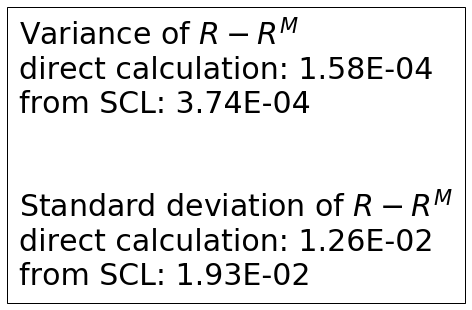

In [56]:
text=[]
text.append(r"Variance of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.var()))
text.append("from SCL: {0:.2E}".format(v_scl))
text.append("\n")
text.append(r"Standard deviation of $R-R^M$")
text.append("direct calculation: {0:.2E}".format(R.std()))
text.append("from SCL: {0:.2E}".format(numpy.sqrt(v_scl)))
fig,ax=plt.subplots()
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("var_compare")
plt.show()
plt.close()